In [1]:
from scipy import signal
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
sig_len_sec = 2
Fs = 100
T = 1/Fs
N = Fs * sig_len_sec
tt = np.arange(0, N) * T

In [3]:
f1 = 2
y1 = np.sin(2 * np.pi * f1 * tt)

In [4]:
f2 = 20
y2 = 0.25 * np.sin(2 * np.pi * f2 * tt)

In [5]:
y3 = y1 + y2

<IPython.core.display.Javascript object>


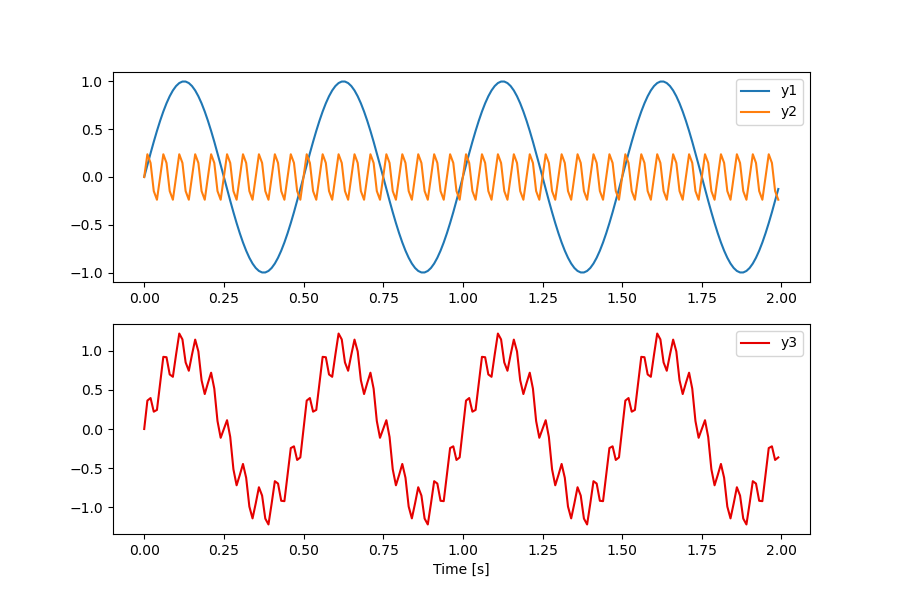

Text(0.5, 0, 'Time [s]')

In [6]:
f = plt.figure(figsize=(9, 6))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212, sharex=ax1)

ax1.plot(tt, y1, label='y1')
ax1.plot(tt, y2, label='y2')
ax1.legend()
ax2.plot(tt, y3, label='y3', color='xkcd:red')
ax2.legend()

ax2.set_xlabel('Time [s]')

In [7]:
N = len(y3)
Y3 = np.fft.fftshift(np.fft.fft(y3))
ff = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N, endpoint=False)

In [8]:
# Create a Frequency Mask, extending into negative frequency domain
mask = np.ones(len(Y3))
mask[130::] = 0
mask[0:70] = 0

<IPython.core.display.Javascript object>


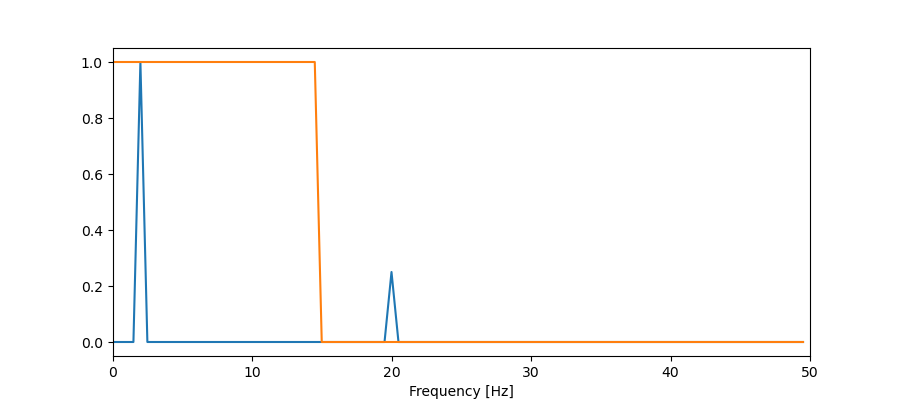

Text(0.5, 0, 'Frequency [Hz]')

In [9]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(ff, np.abs(Y3) / (N/2))  # divide by N/2 to normalize for displaying
ax.plot(ff, mask)
ax.set_xlim([0, Fs/2]) # zoom in on positive frequencies only
ax.set_xlabel('Frequency [Hz]')

In [10]:
y3_filt = np.real(np.fft.ifft(np.fft.ifftshift(mask * Y3)))

<IPython.core.display.Javascript object>


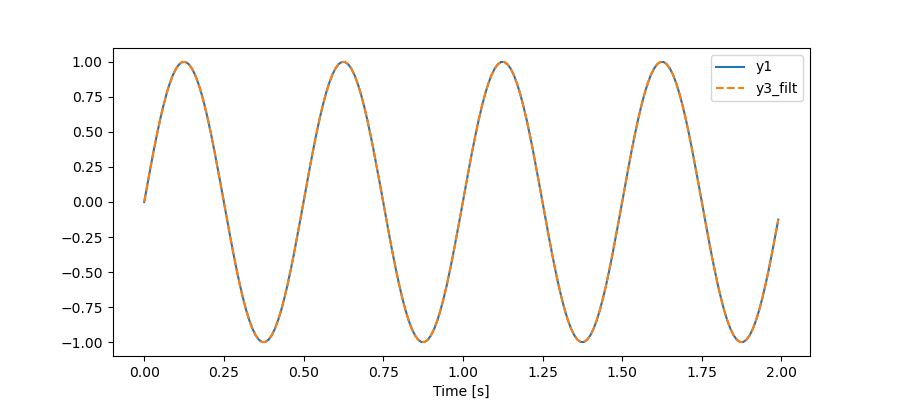

Text(0.5, 0, 'Time [s]')

In [11]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(tt, y1, label='y1')
ax.plot(tt, y3_filt, '--', label='y3_filt')
ax.legend()
ax.set_xlabel('Time [s]')

In [12]:
f1 = 2
y1 = signal.square(2 * np.pi * f1 * tt)

<IPython.core.display.Javascript object>


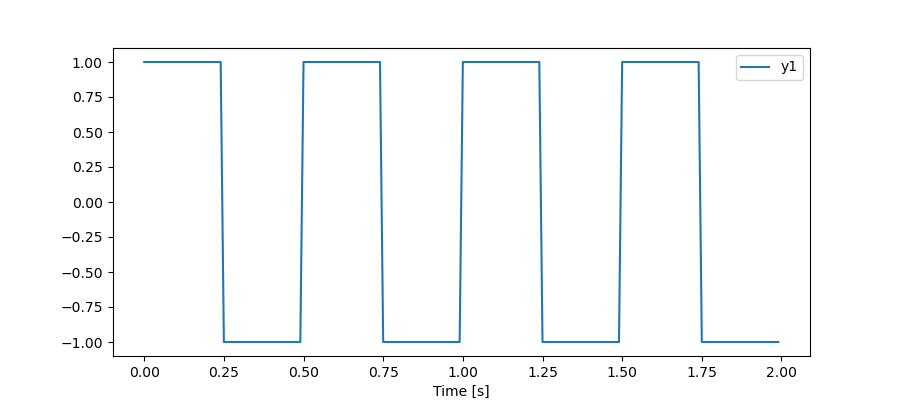

Text(0.5, 0, 'Time [s]')

In [13]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(tt, y1, label='y1')
ax.legend()

ax.set_xlabel('Time [s]')

In [14]:
N = len(y1)
Y1 = np.fft.fftshift(np.fft.fft(y1))
ff = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N, endpoint=False)

In [15]:
# Create a Frequency Mask, extending into negative frequency domain
mask = np.ones(len(Y1))
mask[130::] = 0
mask[0:70] = 0

<IPython.core.display.Javascript object>


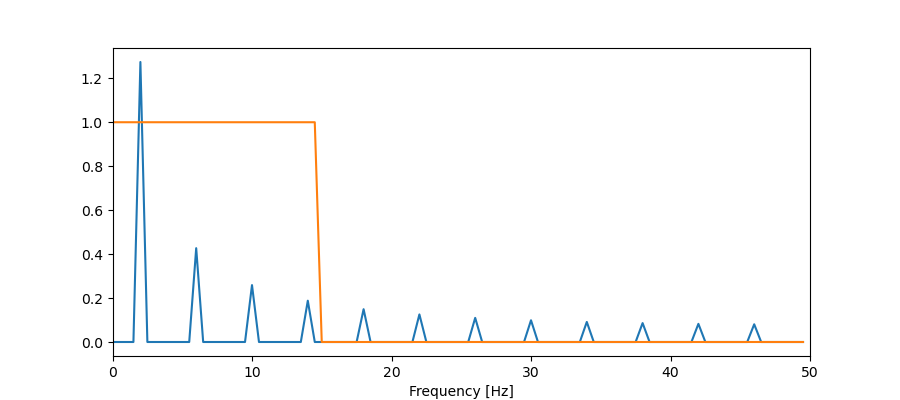

Text(0.5, 0, 'Frequency [Hz]')

In [16]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(ff, np.abs(Y1) / (N/2))  # divide by N/2 to normalize for displaying
ax.plot(ff, mask)

ax.set_xlim([0, Fs/2]) # zoom in on positive frequencies only
ax.set_xlabel('Frequency [Hz]')

In [17]:
y1_filt = np.real(np.fft.ifft(np.fft.ifftshift(mask * Y1)))

<IPython.core.display.Javascript object>


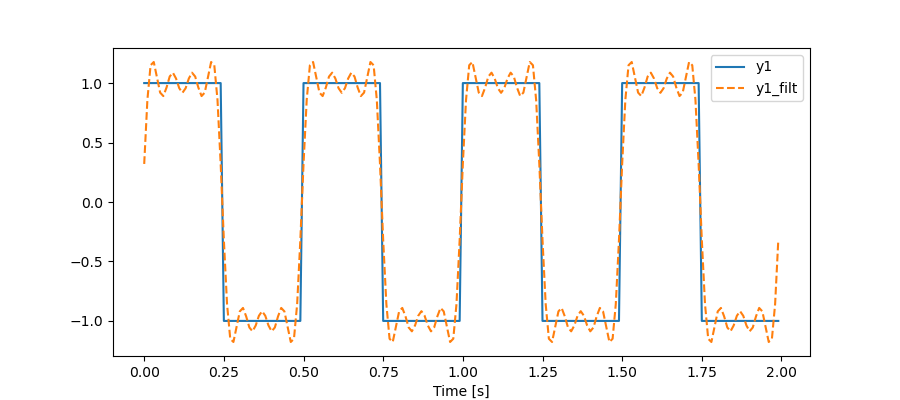

Text(0.5, 0, 'Time [s]')

In [18]:
f = plt.figure(figsize=(9, 4))
ax = f.add_subplot(111)

ax.plot(tt, y1, label='y1')
ax.plot(tt, y1_filt, '--', label='y1_filt')
ax.legend()
ax.set_xlabel('Time [s]')